In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
import pandas as pd
import re

# Load the dataset into a pandas DataFrame
df = pd.read_excel('D:/7 sem/nlp - projects/fac_review.xlsx')

# Select the "Reviews" column
reviews = df['Reviews']

# Function to clean text
def clean_text(text):
    # Remove special characters, non-ASCII characters, and digits
    text = re.sub(r'[^\x00-\x7F]', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the reviews
cleaned_reviews = reviews.apply(clean_text)

# Create a new DataFrame with cleaned reviews
cleaned_df = pd.DataFrame({'cleaned_reviews': cleaned_reviews})

# Concatenate the cleaned DataFrame with the original DataFrame
cleaned_df = pd.concat([df, cleaned_df], axis=1)

# Print the cleaned DataFrame
print(cleaned_df)


           Teacher Name                                            Reviews  \
0                 AJU D  - He is very good. Strict for the project comp...   
1          AKILA VICTOR  - Akila Victor is strict. Padhata kaisa h no i...   
2               ANAND M  - Best! Anand M is a brilliant teacher. 3/5 (1...   
3        ANANDA KUMAR S  - Okayish But not strict. Someone told me he g...   
4            ANBARASI M                                    - Strict in lab   
..                  ...                                                ...   
275     AMUTHA PRABHA N                                 - Okayish teacher.   
276   RASHMI RANJAN DAS  Teaching is good , Project: only review 3 take...   
277  MONICA SUBASHINI M  Teaching is good , no tension if your project ...   
278            RAMESH V  Teaching is not good , Marking is chill\t, No ...   
279          SWATHI J.N                                   - Yeh strict hai   

     Rating                                    cleaned_reviews 

In [4]:
##removing NaN
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)
print(df)

           Teacher Name                                            Reviews  \
0                 AJU D  - He is very good. Strict for the project comp...   
1          AKILA VICTOR  - Akila Victor is strict. Padhata kaisa h no i...   
2               ANAND M  - Best! Anand M is a brilliant teacher. 3/5 (1...   
3        ANANDA KUMAR S  - Okayish But not strict. Someone told me he g...   
4            ANBARASI M                                    - Strict in lab   
..                  ...                                                ...   
275     AMUTHA PRABHA N                                 - Okayish teacher.   
276   RASHMI RANJAN DAS  Teaching is good , Project: only review 3 take...   
277  MONICA SUBASHINI M  Teaching is good , no tension if your project ...   
278            RAMESH V  Teaching is not good , Marking is chill\t, No ...   
279          SWATHI J.N                                   - Yeh strict hai   

     Rating  
0    4.0000  
1    4.0000  
2    3.0000  
3    1.

In [5]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['Teacher Name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/280 [00:00<?, ?it/s]

In [6]:
res_df = pd.DataFrame.from_dict(res, orient='index')

# Merge the sentiment analysis results DataFrame with your original DataFrame
vaders = pd.merge(df, res_df, left_on='Teacher Name', right_index=True, how='left')

vaders.head(20)

,Teacher Name,Reviews,Rating,neg,neu,pos,compound
0,AJU D,- He is very good. Strict for the project comp...,4.0000,0.000,0.727,0.273,0.7496
1,AKILA VICTOR,- Akila Victor is strict. Padhata kaisa h no i...,4.0000,0.110,0.890,0.000,-0.1531
2,ANAND M,- Best! Anand M is a brilliant teacher. 3/5 (1...,3.0000,0.000,0.472,0.528,0.9089
3,ANANDA KUMAR S,- Okayish But not strict. Someone told me he g...,1.5000,0.145,0.764,0.091,-0.6520
4,ANBARASI M,- Strict in lab,3.3274,0.000,1.000,0.000,0.0000
5,ANIL KUMAR K,- I had him for my Network Security. Banda acc...,2.0000,0.112,0.827,0.061,-0.3419
6,ANISHA M. LAL,- She is good. Good. Anisha M is better than N...,3.5000,0.000,0.494,0.506,0.9468
7,ANNY LEEMA A,- She is my proctor. Nature wise she is good. ...,3.3274,0.000,0.609,0.391,0.9601
8,ANTO S,- 4/5 (1 review). Very chill in exam and proje...,4.0000,0.000,1.000,0.000,0.0000
9,ANURADHA D,"- Anuradha D is best, doesn't know much about ...",3.3274,0.060,0.758,0.182,0.7396


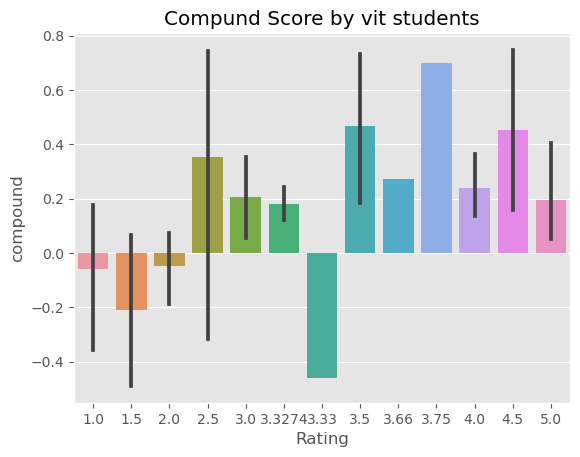

In [7]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by vit students')
plt.show()

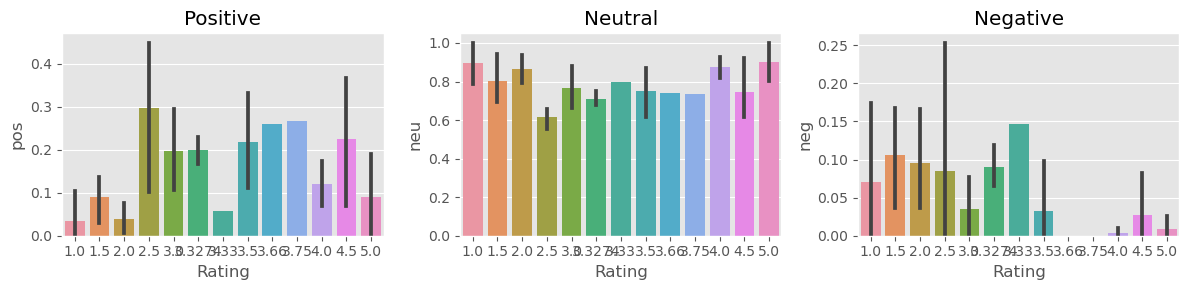

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [9]:

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [10]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


D:\condaa\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [11]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [12]:

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        myid = row['Teacher Name']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/280 [00:00<?, ?it/s]

In [22]:
results_df = pd.DataFrame.from_dict(res, orient='index')

# Merge the sentiment analysis results DataFrame with your original DataFrame
results_df = pd.merge(df, results_df, left_on='Teacher Name', right_index=True, how='left')


In [23]:
results_df.head(20)

,Teacher Name,Reviews,Rating,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,AJU D,- He is very good. Strict for the project comp...,4.0000,0.000,0.727,0.273,0.7496,0.003519,0.034420,0.962061
1,AKILA VICTOR,- Akila Victor is strict. Padhata kaisa h no i...,4.0000,0.110,0.890,0.000,-0.1531,0.255589,0.710607,0.033804
2,ANAND M,- Best! Anand M is a brilliant teacher. 3/5 (1...,3.0000,0.000,0.472,0.528,0.9089,0.003226,0.022777,0.973997
3,ANANDA KUMAR S,- Okayish But not strict. Someone told me he g...,1.5000,0.145,0.764,0.091,-0.6520,0.522702,0.399247,0.078052
4,ANBARASI M,- Strict in lab,3.3274,0.000,1.000,0.000,0.0000,0.105857,0.828711,0.065432
5,ANIL KUMAR K,- I had him for my Network Security. Banda acc...,2.0000,0.112,0.827,0.061,-0.3419,0.934819,0.060984,0.004197
6,ANISHA M. LAL,- She is good. Good. Anisha M is better than N...,3.5000,0.000,0.494,0.506,0.9468,0.009096,0.055035,0.935869
7,ANNY LEEMA A,- She is my proctor. Nature wise she is good. ...,3.3274,0.000,0.609,0.391,0.9601,0.003377,0.031053,0.965570
8,ANTO S,- 4/5 (1 review). Very chill in exam and proje...,4.0000,0.000,1.000,0.000,0.0000,0.013534,0.396198,0.590268
9,ANURADHA D,"- Anuradha D is best, doesn't know much about ...",3.3274,0.060,0.758,0.182,0.7396,0.487450,0.338513,0.174037


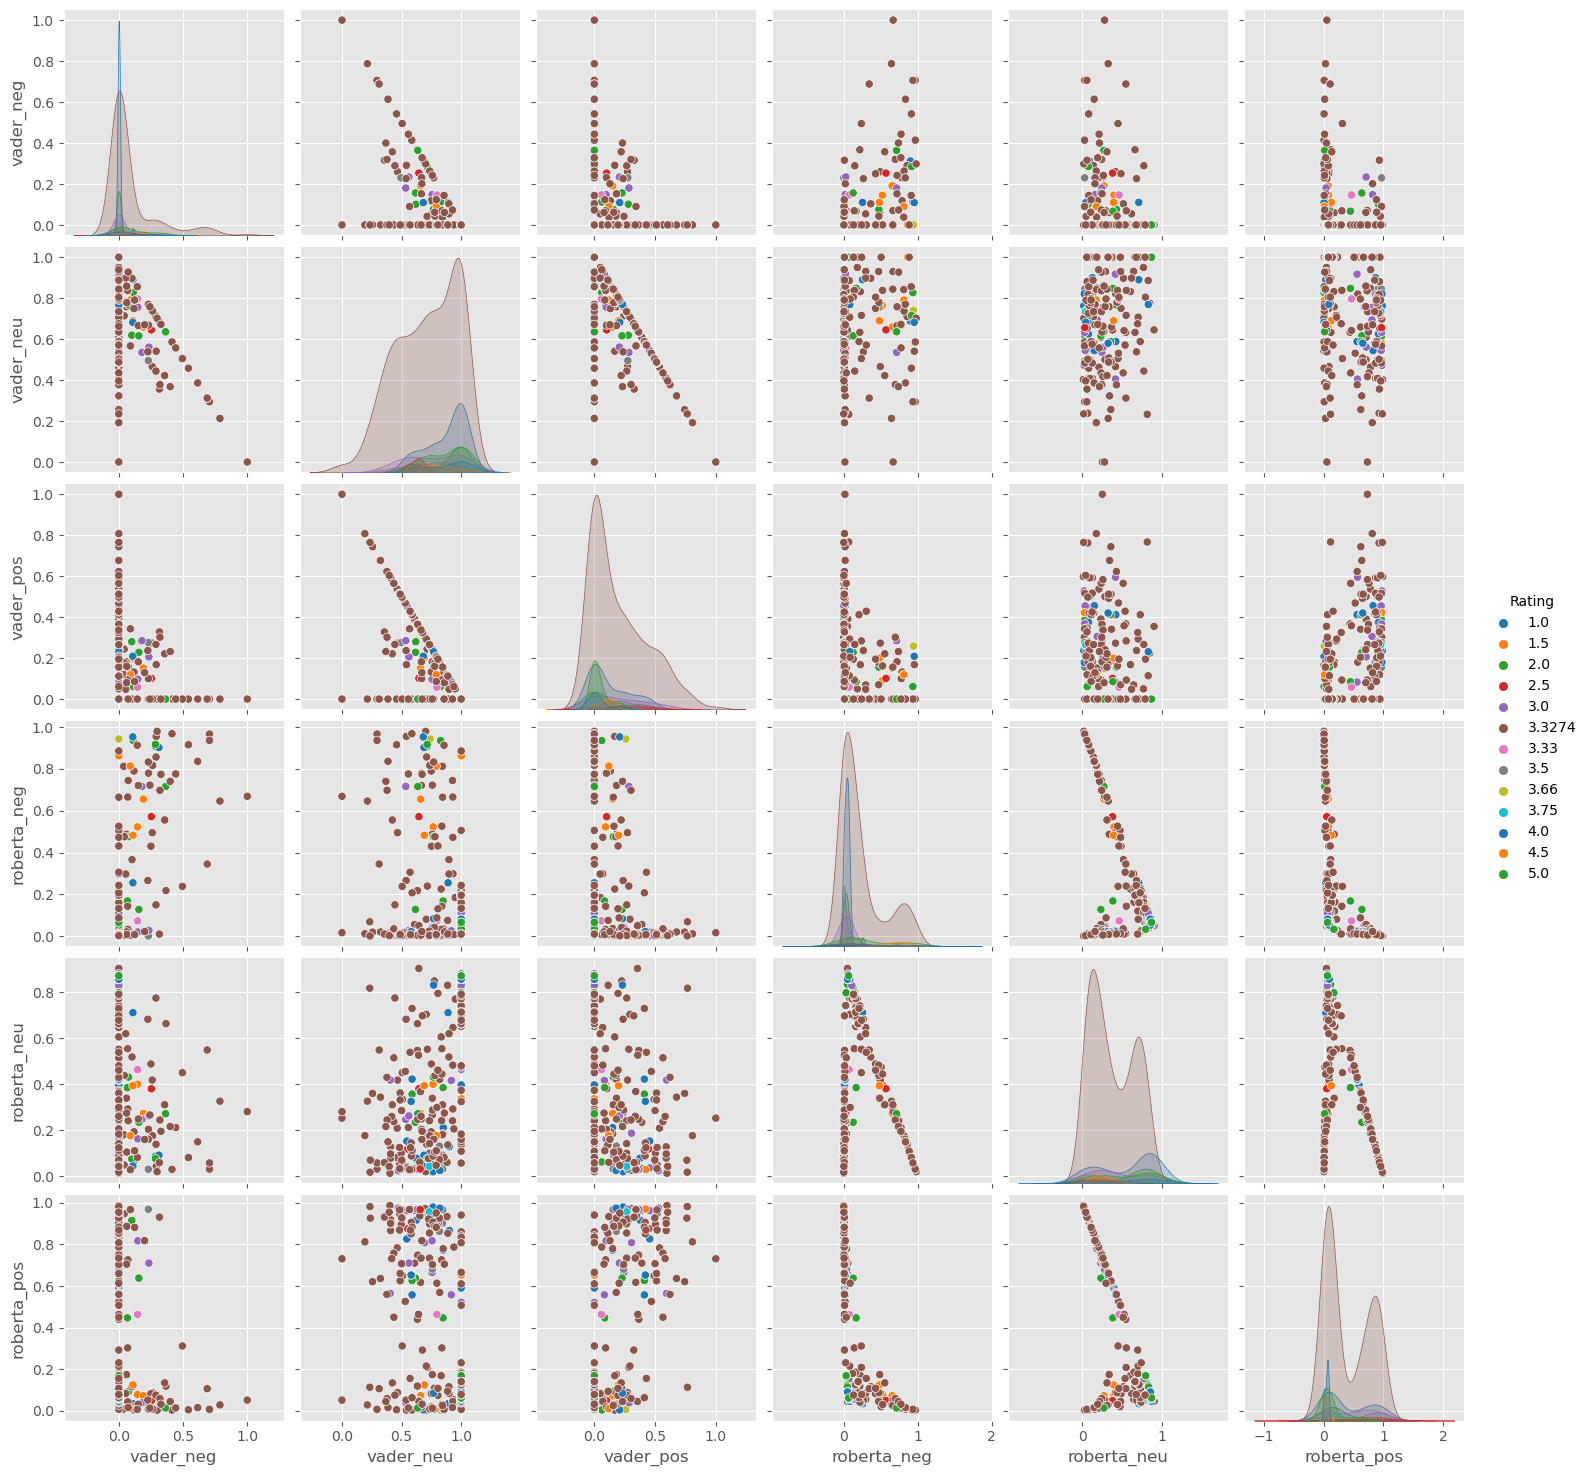

In [24]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [27]:
highest_positive_teacher = results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False) \
    .iloc[0]

teacher_name = highest_positive_teacher['Teacher Name']
review = highest_positive_teacher['Reviews']

print("Teacher Name:", teacher_name)
print("Review:", review)

Teacher Name: JEYAPANDIARAJAN P
Review: - Strict, 1 out of 5 (1 review).


In [28]:
highest_positive_teacher = results_df.query('Rating > 4') \
    .sort_values('roberta_pos', ascending=False) \
    .iloc[0]

teacher_name = highest_positive_teacher['Teacher Name']
review = highest_positive_teacher['Reviews']

print("Teacher Name:", teacher_name)
print("Review:", review)

Teacher Name: MARIMUTHU K
Review: - Marimuthu is chilllll. Marimuthu best h. Lenient, 4.5/5 (2 reviews). He’s a really good teacher. Mst h bhai.


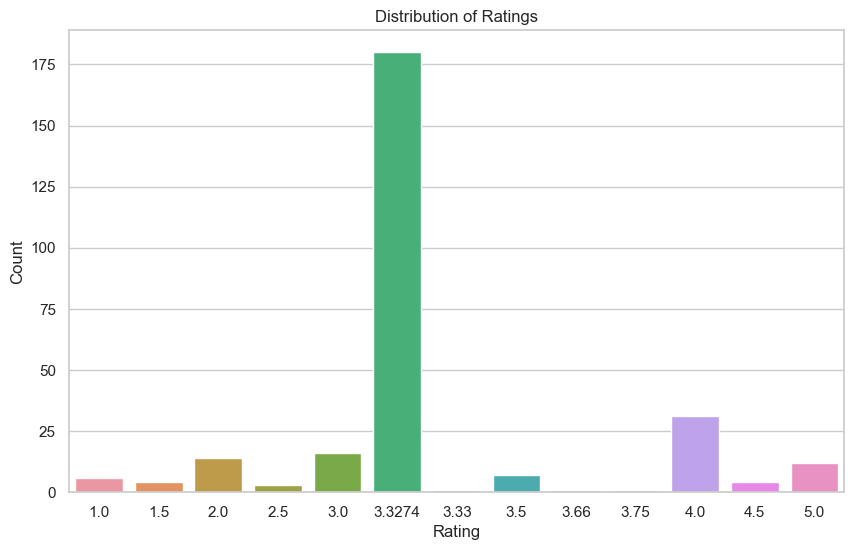

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



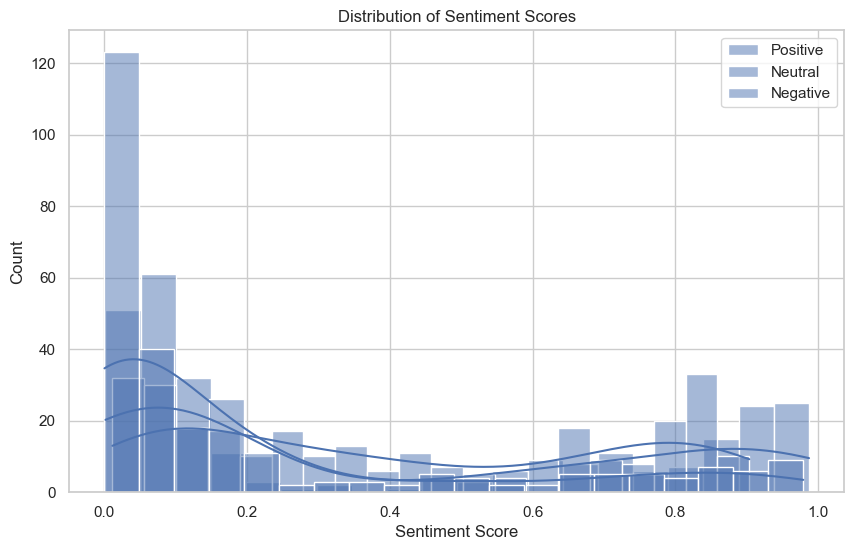

In [31]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='roberta_pos', bins=20, kde=True, label='Positive')
sns.histplot(data=results_df, x='roberta_neu', bins=20, kde=True, label='Neutral')
sns.histplot(data=results_df, x='roberta_neg', bins=20, kde=True, label='Negative')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.legend()
plt.show()

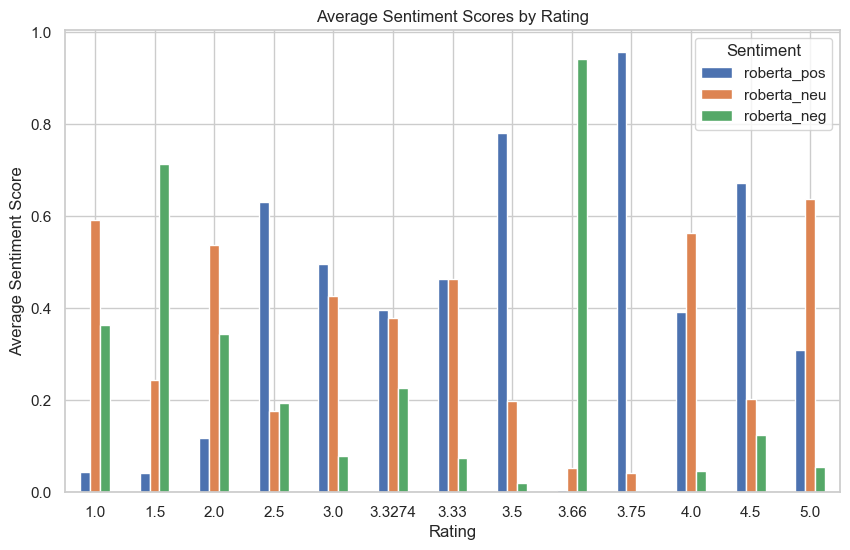

In [32]:

# Plot the average sentiment scores for each rating category
avg_sentiment_by_rating = results_df.groupby('Rating')[['roberta_pos', 'roberta_neu', 'roberta_neg']].mean()
avg_sentiment_by_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.show()

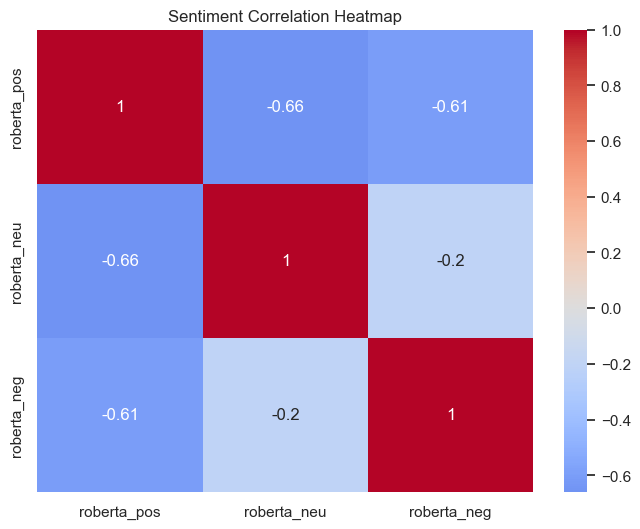

In [33]:

# Create a heatmap of sentiment correlations
sentiment_corr = results_df[['roberta_pos', 'roberta_neu', 'roberta_neg']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Sentiment Correlation Heatmap')
plt.show()

In [30]:
# Calculate the average sentiment scores and ratings for each teacher
avg_sentiment_and_rating_by_teacher = results_df.groupby('Teacher Name')[['roberta_pos', 'roberta_neu', 'roberta_neg', 'Rating']].mean()

# Find the teacher with the highest average positive sentiment score
best_teacher = avg_sentiment_and_rating_by_teacher.sort_values('roberta_pos', ascending=False).index[0]

# Find the teacher with the lowest average positive sentiment score
worst_teacher = avg_sentiment_and_rating_by_teacher.sort_values('roberta_pos').index[0]

# Find the teacher with the highest negative sentiment score and lowest neutral score
strict_teacher = avg_sentiment_and_rating_by_teacher.sort_values(['roberta_neg', 'roberta_neu']).index[0]

# Find the teacher with the highest neutral score and lowest negative score
chill_teacher = avg_sentiment_and_rating_by_teacher.sort_values(['roberta_neu', 'roberta_neg'], ascending=[False, True]).index[0]

print("Best Teacher:", best_teacher)
print("Worst Teacher:", worst_teacher)
print("Strict Teacher:", strict_teacher)
print("Chill Teacher:", chill_teacher)


Best Teacher: GAWAS MAHADEV ANANT
Worst Teacher: SATHYARAJ R
Strict Teacher: GAWAS MAHADEV ANANT
Chill Teacher: JAYASHREE J
